In [1]:
#description: use the realtive strength index or RSI in python to determine if a stock is being over bought or oversold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

In [4]:
fb = pd.read_csv("/Users/aryan/Desktop/FB.csv", index_col = "Date")

In [5]:
fb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-05,250.190002,252.270004,247.770004,249.119995,249.119995,13050100
2020-08-06,249.039993,266.600006,248.669998,265.279999,265.279999,45241600
2020-08-07,264.079987,278.890015,263.429993,268.440002,268.440002,72766400
2020-08-10,268.040009,273.859985,259.690002,263.000000,263.000000,30248800
2020-08-11,260.190002,265.920013,255.130005,256.130005,256.130005,28238300
...,...,...,...,...,...,...
2021-07-29,361.000000,365.519989,356.739990,358.320007,358.320007,33413200
2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15966700
2021-08-02,358.100006,359.399994,350.739990,351.950012,351.950012,13180400


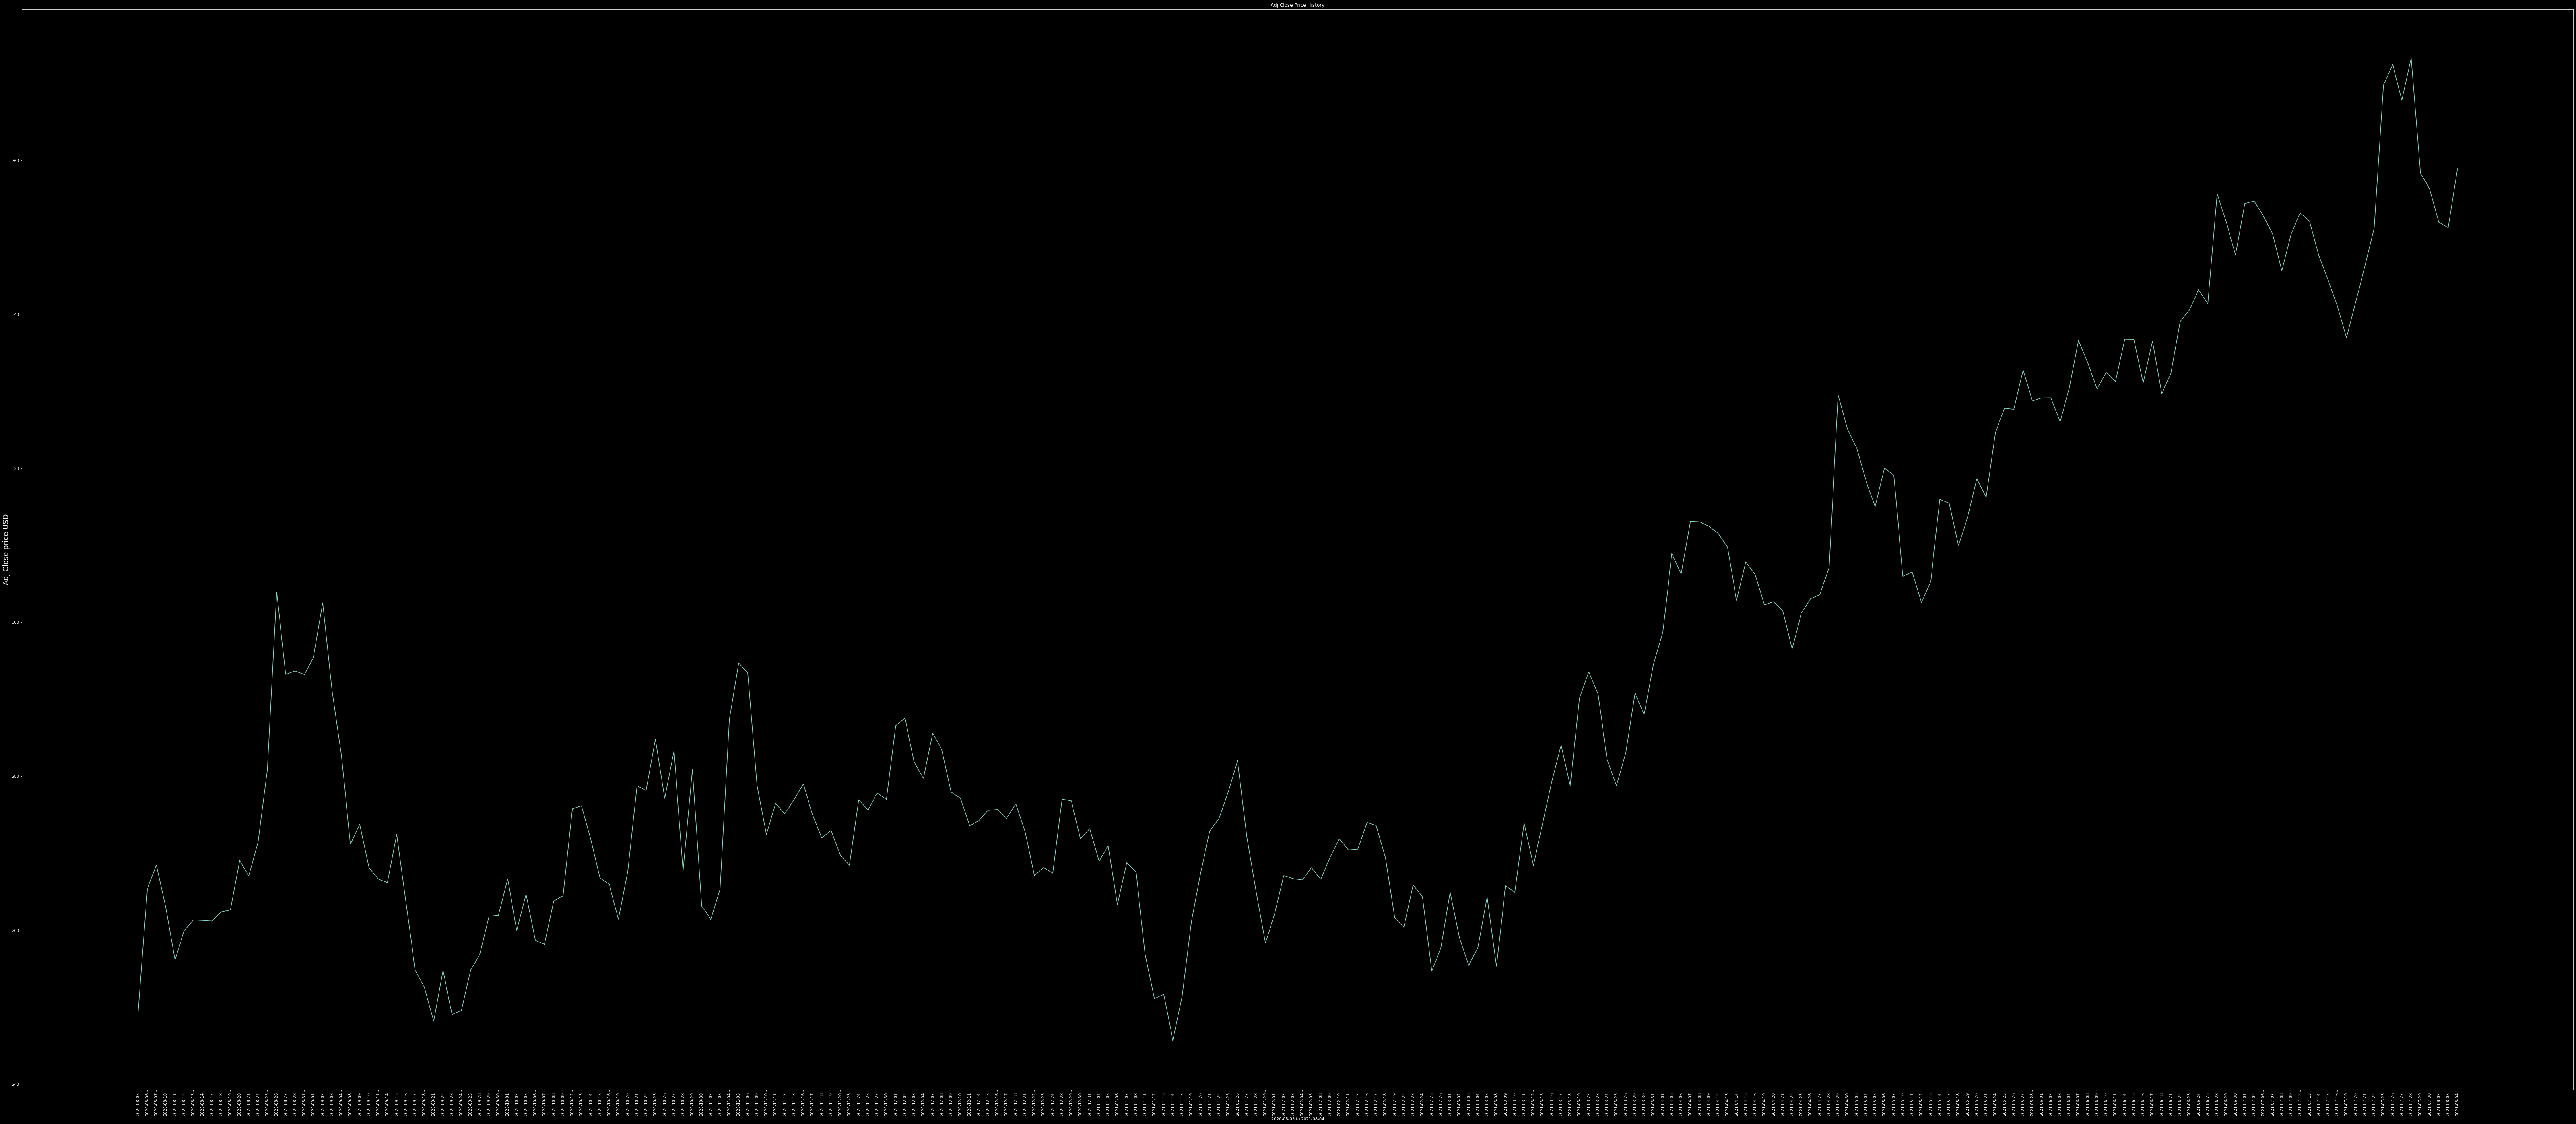

In [6]:
#visual representation 
plt.figure(figsize=(115, 50))
plt.plot(fb.index, fb['Adj Close'], label = 'Adj Close Price')
plt.title('Adj Close Price History')
plt.xlabel('2020-08-05 to 2021-08-04')
plt.ylabel('Adj Close price USD', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

In [7]:
#preparing the data to calculate the RSI:
#get the difference in price from the previous day
delta = fb['Adj Close'].diff(1)
delta


Date
2020-08-05          NaN
2020-08-06    16.160004
2020-08-07     3.160003
2020-08-10    -5.440002
2020-08-11    -6.869995
                ...    
2021-07-29   -14.959992
2021-07-30    -2.020019
2021-08-02    -4.349976
2021-08-03    -0.710022
2021-08-04     7.680023
Name: Adj Close, Length: 252, dtype: float64

In [8]:
#get rid of the NaN 
delta = delta.dropna()

In [9]:
delta

Date
2020-08-06    16.160004
2020-08-07     3.160003
2020-08-10    -5.440002
2020-08-11    -6.869995
2020-08-12     3.760010
                ...    
2021-07-29   -14.959992
2021-07-30    -2.020019
2021-08-02    -4.349976
2021-08-03    -0.710022
2021-08-04     7.680023
Name: Adj Close, Length: 251, dtype: float64

In [10]:
#get the positive gains and the negative gains
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

In [11]:
up

Date
2020-08-06    16.160004
2020-08-07     3.160003
2020-08-10     0.000000
2020-08-11     0.000000
2020-08-12     3.760010
                ...    
2021-07-29     0.000000
2021-07-30     0.000000
2021-08-02     0.000000
2021-08-03     0.000000
2021-08-04     7.680023
Name: Adj Close, Length: 251, dtype: float64

In [12]:
down

Date
2020-08-06     0.000000
2020-08-07     0.000000
2020-08-10    -5.440002
2020-08-11    -6.869995
2020-08-12     0.000000
                ...    
2021-07-29   -14.959992
2021-07-30    -2.020019
2021-08-02    -4.349976
2021-08-03    -0.710022
2021-08-04     0.000000
Name: Adj Close, Length: 251, dtype: float64

In [13]:
# get the time period
period = 14

#calculate the average gain and the average loss
Avg_gain = up.rolling(window=period).mean()
Avg_loss = abs(down.rolling(window=period).mean())

In [14]:
#calulate the RSI two steps:


#1> calculating the relative strength (RS)

RS = Avg_gain/ Avg_loss

#2> calcualting the RSI

RSI = 100.0 - (100.0/(1.0 + RS))

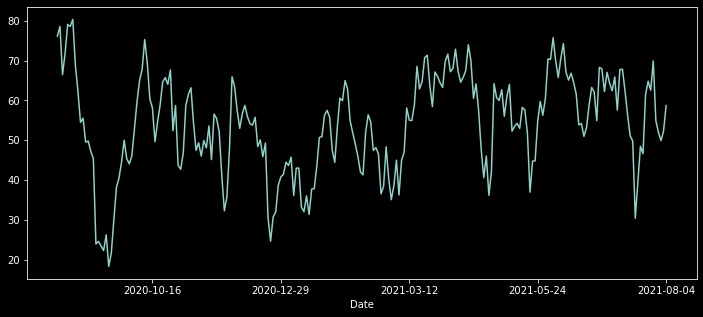

In [15]:
plt.figure(figsize = (12, 5))
RSI.plot()
plt.show()

In [16]:
#put it all together

# create a new dataframe

new_df = pd.DataFrame()
new_df['Adj Close'] = fb['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
Date,,
2020-08-05,249.119995,NaN
2020-08-06,265.279999,NaN
2020-08-07,268.440002,NaN
2020-08-10,263.000000,NaN
2020-08-11,256.130005,NaN
...,...,...
2021-07-29,358.320007,54.966054
2021-07-30,356.299988,51.991871
2021-08-02,351.950012,49.914748


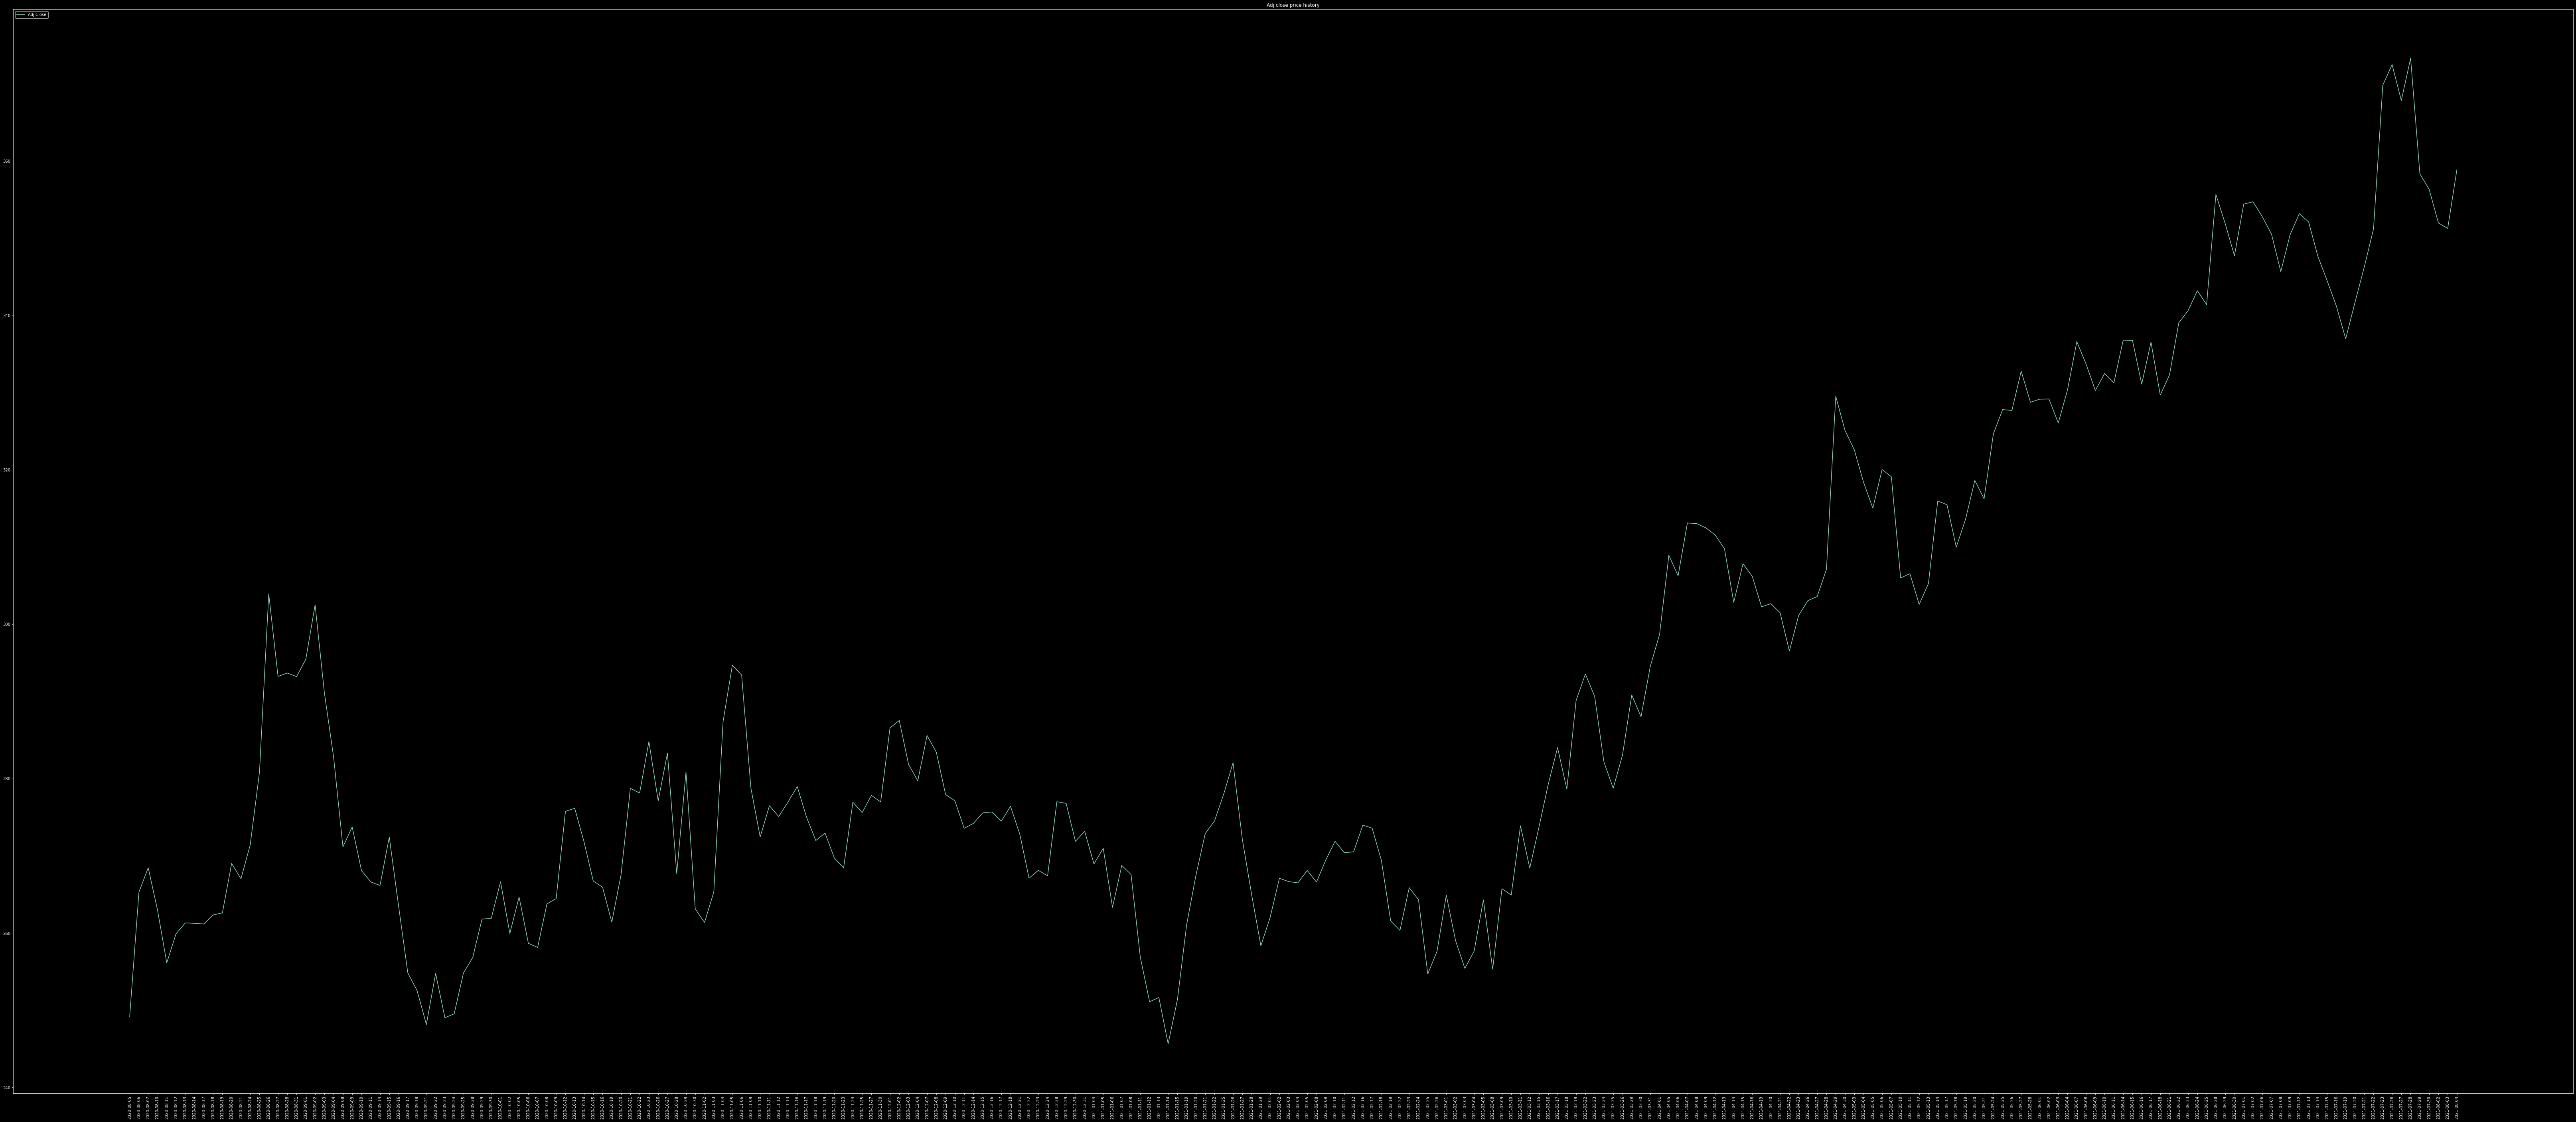

In [17]:
#visual representation 
#plt the adj close price
plt.figure(figsize = (115,50))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj close price history')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.xticks(rotation = 90)
plt.show()




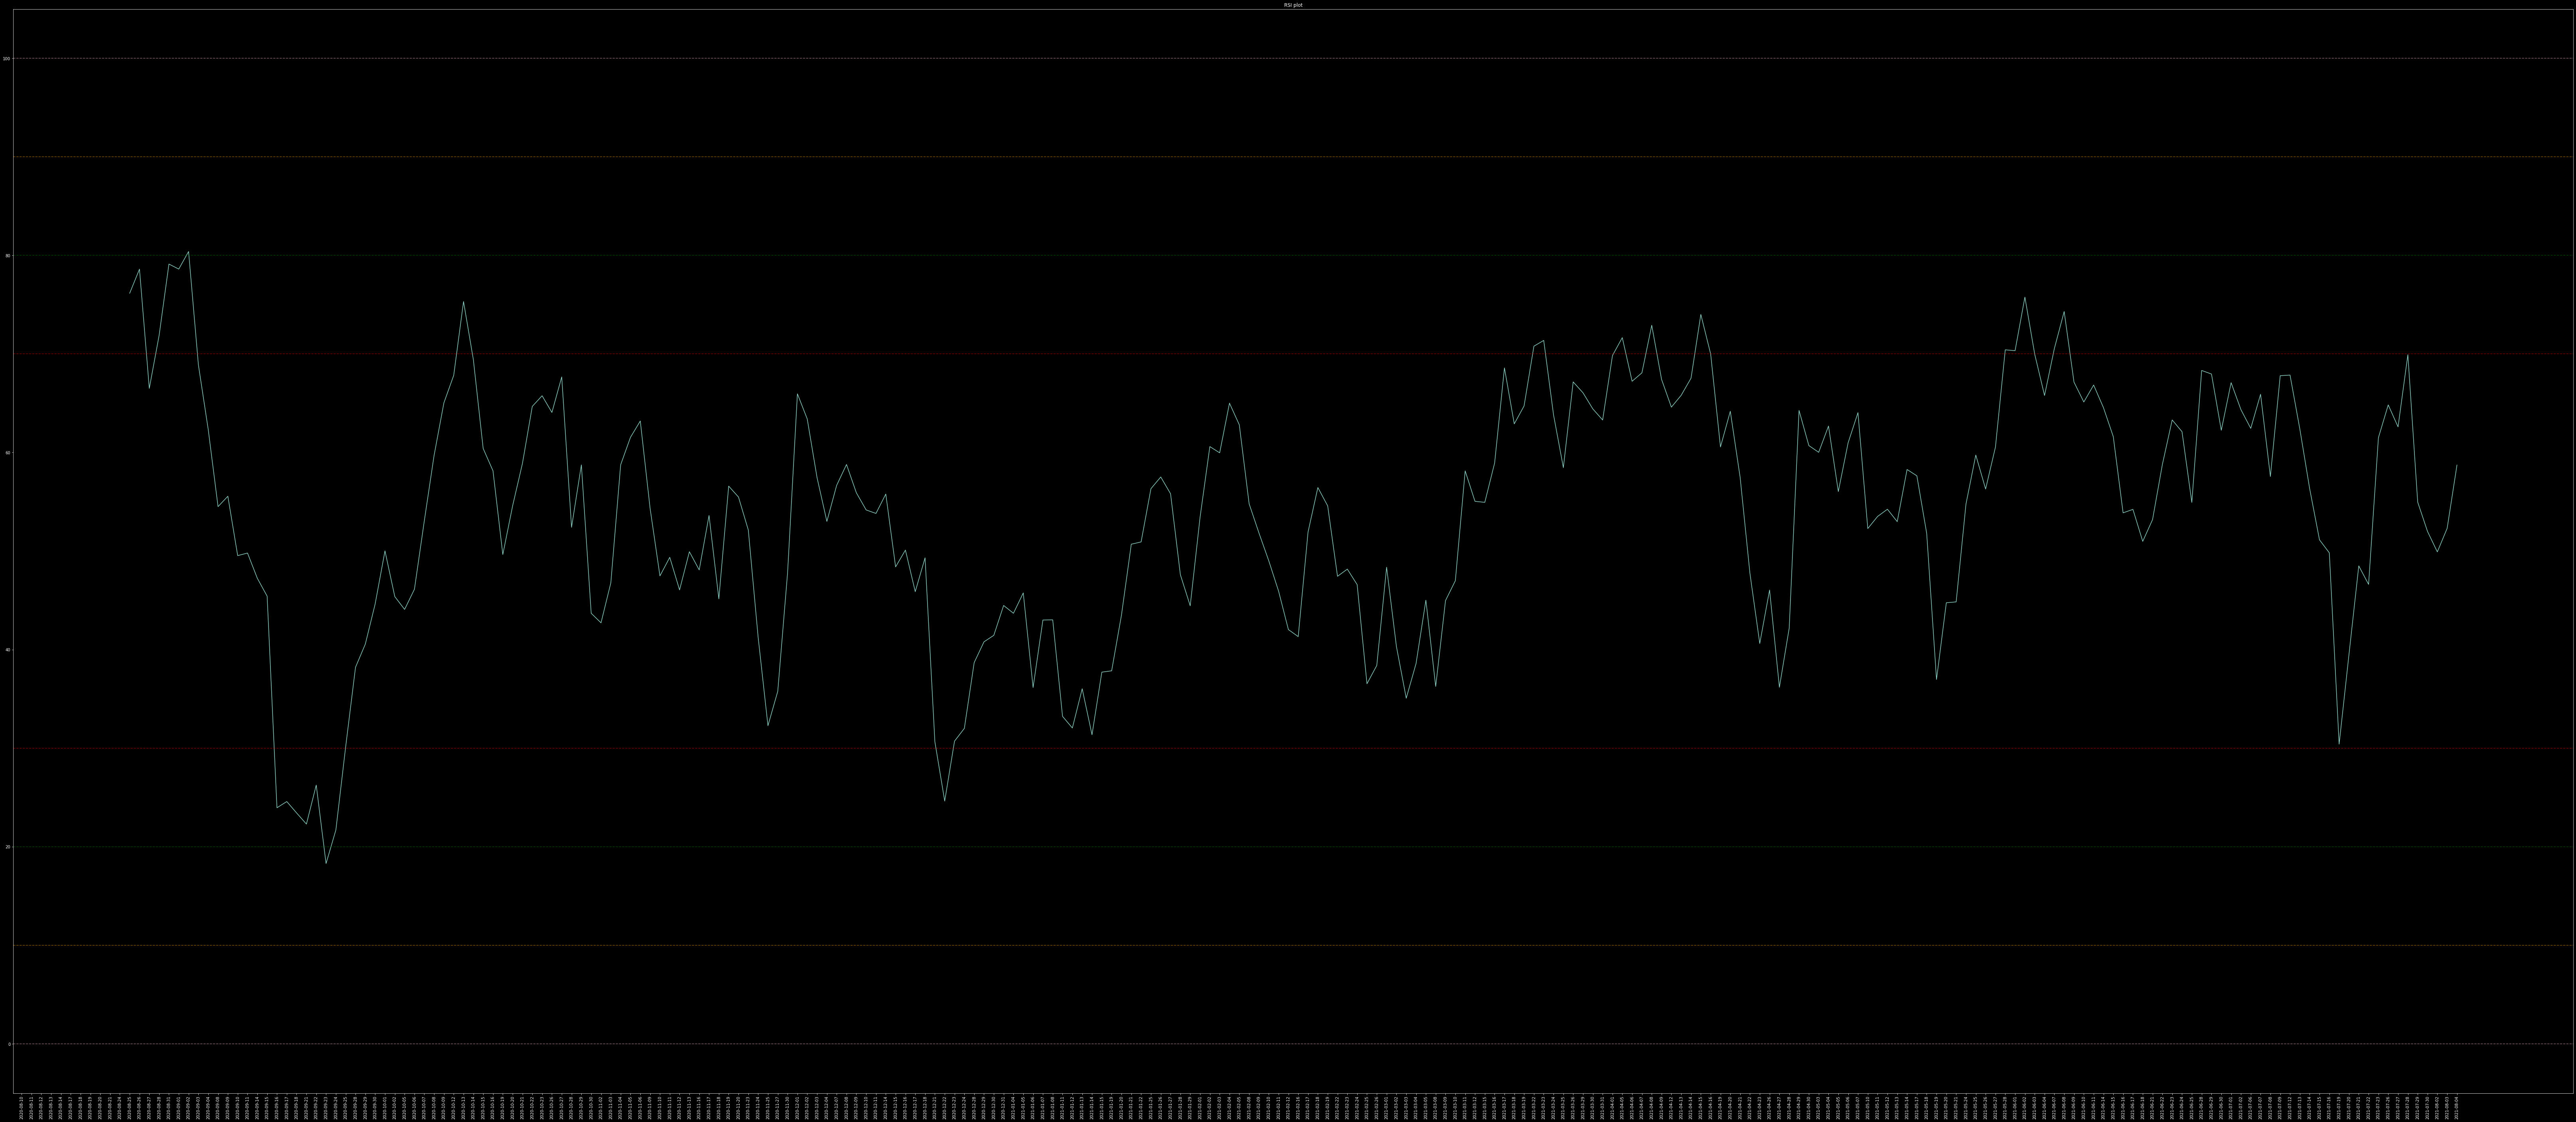

In [20]:
#plt the corresponding RSI values
plt.figure(figsize = (115, 50))
plt.title('RSI plot')
plt.plot(new_df.index, new_df['RSI'])
plt.xticks(rotation = 90)
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'pink')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'pink')